In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np

In [4]:
stations_april_2022_df = pd.read_csv("./BIXI_Data/April 2022/20220104_stations.csv", delimiter = ",", index_col="pk")

In [5]:
stations_april_2022_df.head()

,name,latitude,longitude
pk,,,
9,LaSalle / 90e avenue,45.417294,-73.644300
10,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630
13,Métro de l'Église (Ross / de l'Église),45.462726,-73.565959
17,Tolhurst / Fleury,45.544149,-73.667520
38,Métro Vendôme (de Marlowe / de Maisonneuve),45.473868,-73.604538


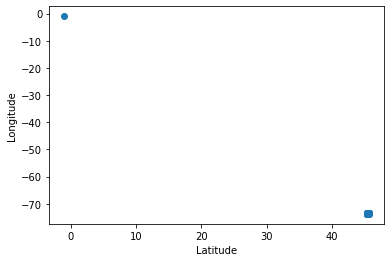

In [14]:
plt.scatter(stations_april_2022_df["latitude"], stations_april_2022_df["longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [13]:
stations_april_2022_df["latitude"].value_counts(bins = [-10, 0, 10, 20, 30, 40, 50])



(40.0, 50.0]      724
(-10.001, 0.0]      1
(0.0, 10.0]         0
(10.0, 20.0]        0
(20.0, 30.0]        0
(30.0, 40.0]        0
Name: latitude, dtype: int64

## Drop Station 856 Smith / Peel -1.0,-1.0

In [15]:
stations_april_2022_df = stations_april_2022_df[stations_april_2022_df["latitude"] >= 0]


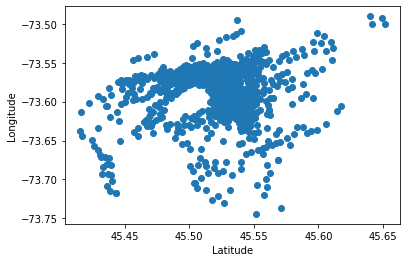

In [16]:
plt.scatter(stations_april_2022_df["latitude"], stations_april_2022_df["longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
fig = px.scatter_mapbox(stations_april_2022_df, 
                        lon = stations_april_2022_df["longitude"], 
                        lat = stations_april_2022_df["latitude"], 
                        zoom = 3, 
                        hover_name = stations_april_2022_df["name"], 
                        width = 1200, 
                        height = 900, 
                        title = "Bixi Stations in Montreal"
)
fig.update_layout(mapbox_style = "open-street-map")
fig.show()
# https://www.youtube.com/watch?v=1-6ndLqsy6M&ab_channel=SeanMacKenzieDataEngineering

In [25]:
Stations_2014_df = pd.read_csv("./BIXI_Data/Year 2014/BixiMontrealRentals2014/Stations_2014.csv", delimiter = ",", index_col="code")

In [26]:
Stations_2014_df.head()

,name,latitude,longitude
code,,,
6209,Milton / Clark,45.512520,-73.570620
6436,Côte St-Antoine / Clarke,45.486452,-73.595234
6214,Square St-Louis,45.517350,-73.569060
6248,St-Dominique / Rachel,45.518593,-73.581566
6164,Chambord / Laurier,45.532955,-73.584194


In [45]:
Stations_2015_df = pd.read_csv("./BIXI_Data/Year 2015/BixiMontrealRentals2015/Stations_2015.csv", delimiter = ",", index_col="code")
Stations_2015_df['code'] = Stations_2015_df.index


In [58]:
df_all = Stations_2015_df.merge(Stations_2014_df.drop_duplicates(), on=["latitude","longitude","name"], 
                   how='left', indicator=True)


In [59]:
df_all.head()

,name,latitude,longitude,code,_merge
0,Chambord / Laurier,45.532955,-73.584194,6164,both
1,Parc Jeanne Mance (monument George-Étienne Car...,45.514960,-73.585030,6216,both
2,Berri / St-Grégoire,45.529802,-73.591766,6192,both
3,Gilford / Brébeuf,45.530730,-73.581530,6158,both
4,Marquette / Rachel,45.529802,-73.570290,6140,both


In [60]:
df_all['_merge'].value_counts()

both          458
left_only       2
right_only      0
Name: _merge, dtype: int64

In [51]:
df_all[df_all['_merge'] == "left_only"]

,name,latitude,longitude,code,_merge
249,Greene / St-Ambroise,45.478796,-73.576424,6748,left_only
419,Drolet / St-Zotique,45.534795,-73.609546,6311,left_only


In [64]:
df_all['2014_Station'] = np.where(df_all['_merge']=='both', 1, 0)


In [67]:
df_all['2015_Station'] = 1


In [68]:
df_all.head()

,name,latitude,longitude,code,_merge,2014_Station,2015_Station
0,Chambord / Laurier,45.532955,-73.584194,6164,both,1,1
1,Parc Jeanne Mance (monument George-Étienne Car...,45.514960,-73.585030,6216,both,1,1
2,Berri / St-Grégoire,45.529802,-73.591766,6192,both,1,1
3,Gilford / Brébeuf,45.530730,-73.581530,6158,both,1,1
4,Marquette / Rachel,45.529802,-73.570290,6140,both,1,1


In [ ]:
# Finish columns until 2020
# Merge with 2021, 2022 with new codes
# Create maps with new stations as different colors 

In [64]:
df_all = pd.DataFrame(columns = ["latitude","longitude","name", "Code"])
for year in range(2014,2018):
    link = f"./BIXI_Data/Year {year}/Stations_{year}.csv"
    Stations_df = pd.read_csv(link, delimiter = ",")
    Stations_df.rename(columns = {"code":"Code", "pk":"Code"}, inplace=True)
    df_all = Stations_df.merge(df_all.drop_duplicates(), on=["latitude","longitude","name","Code"], 
                   how='left', indicator=True)
    df_all[f'{year}_Station'] = 1
    df_all = df_all.drop('_merge', axis=1)
    print(year)

    

2014
2015
2016
2017


In [65]:
df_all.isnull().sum(axis = 0)


Code              0
name              0
latitude          0
longitude         0
Code_x          310
Code_y          311
Code_x          311
Code_y          546
2014_Station    311
2015_Station    311
2016_Station    310
2017_Station      0
dtype: int64